In [1]:
from math import sin, pi, exp
import matplotlib.pyplot as plt

In [2]:
def fi(uk, x, l):

    u = [0.0] * (len(x))
    for i in range(len(x)):
        u[i] = uk[0] + x[i] * (uk[1] - uk[0]) + sin(l * 2 * pi * x[i])
    return u

In [3]:
def persecution(a, b, c, f, uk, n):

    # y array initialization
    y = [0] * (n + 1)
    alpha = [0]
    beta = [uk[0]]
    # 1-st index - first to use

    # alpha & beta array initializations
    for i in range(n):

        alpha.append(b / (c - a * alpha[i]))
        beta.append((f[i] + a * beta[i]) / (c - a * alpha[i]))

    y[-1] = uk[1]

    for i in range(n - 1, -1, -1):
        y[i] = alpha[i] * y[i + 1] + beta[i]
    return y[1:]

In [4]:
def anal(l, t, uk, x):

    u0 = [uk[0]]
    for i in range(1, len(x)-1):
        a = sin(l * pi * x[i]) * exp(-1 * t * ((l * pi) ** 2)) + uk[0] + x[i] * (uk[1] - uk[0])
        u0.append(a)
    u0.append(uk[1])
    return u0

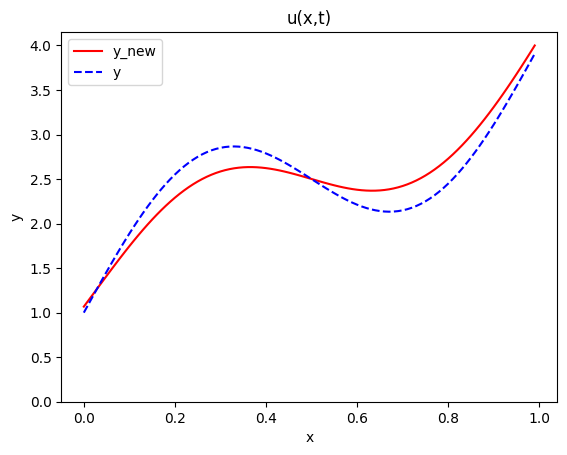

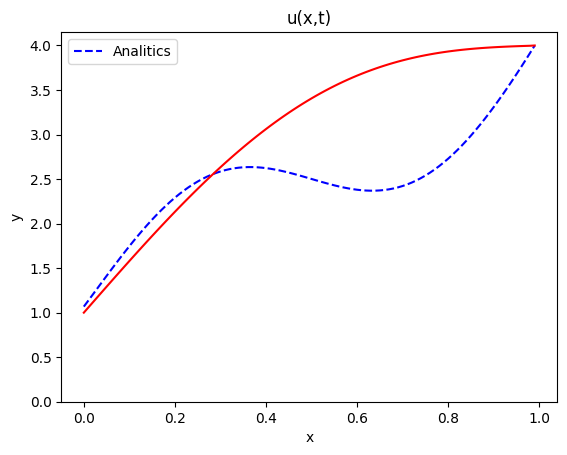

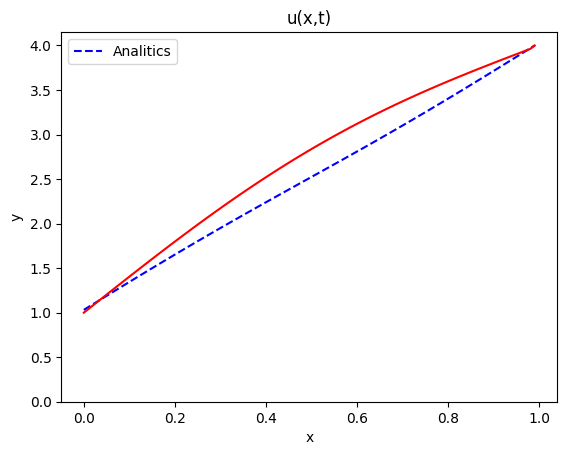

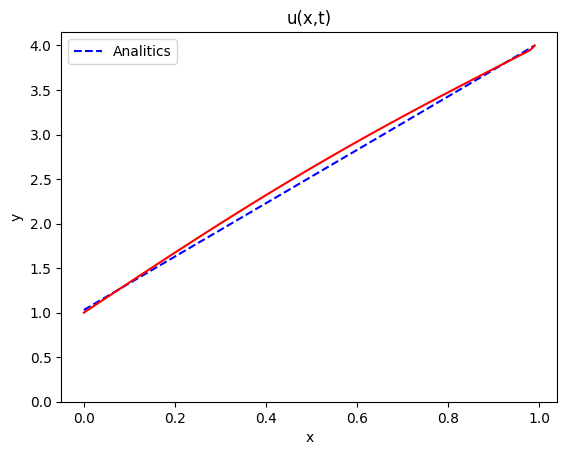

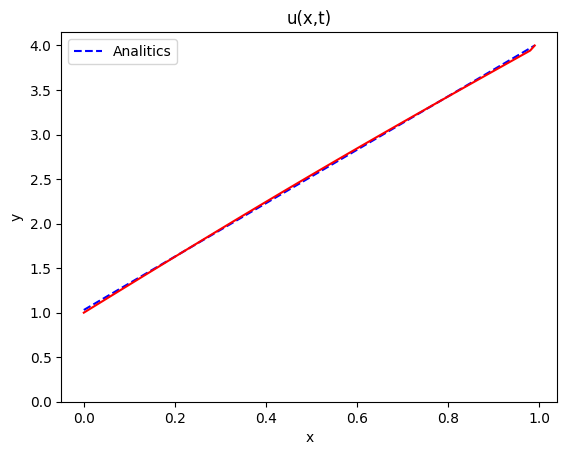

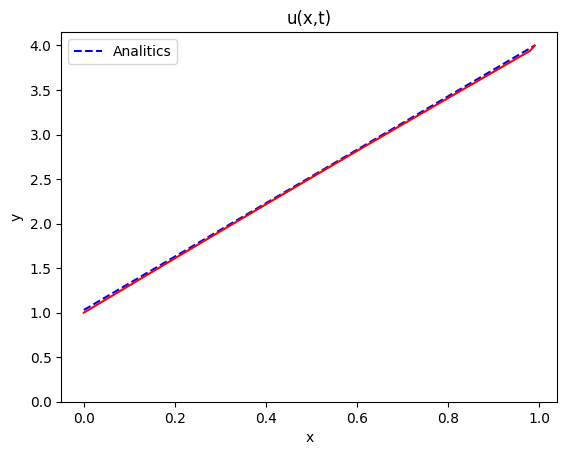

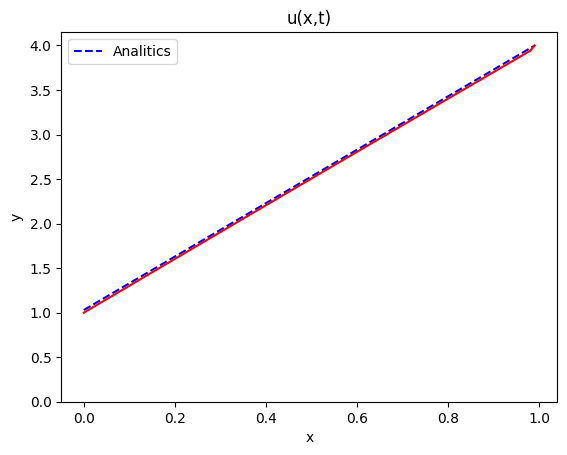

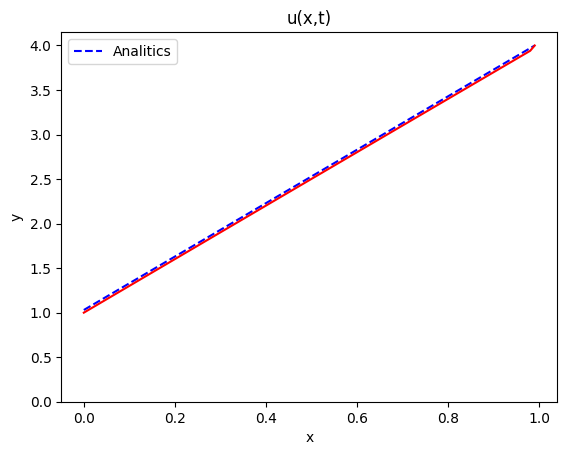

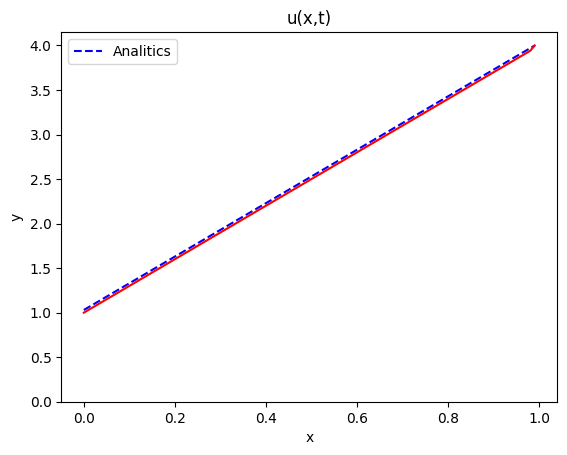

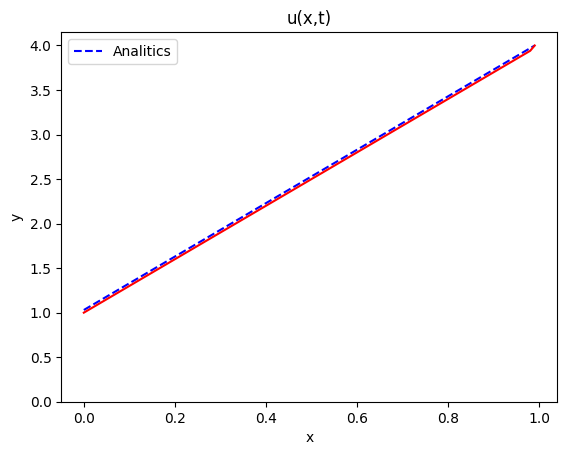

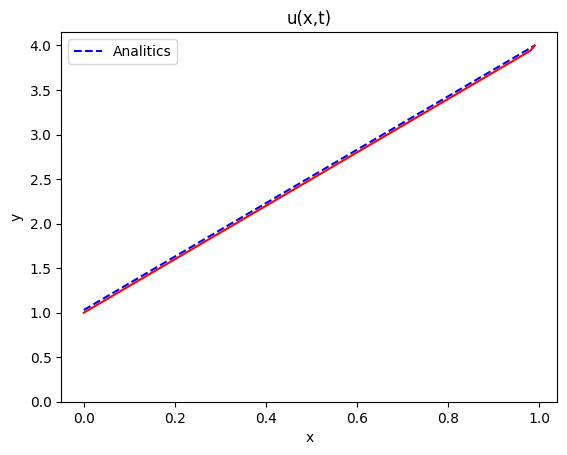

Max delta = 0.029999970366245243


In [8]:
n = 100
tau = 1e-2
h = 1/n
m = 100
T = [0] * m
x = [i*h for i in range(m)]

l = 1
k = 1
L = [1, 2, 3]

a = tau / (h ** 2)
b = tau / (h ** 2)
c = a + b + 1
uk = [1, 4]
xk = [1, 4]

y = fi(uk, x, l)
y_new = persecution(a, b, c, y, uk, m)
plt.plot(x, y_new, 'red', label='y_new')
plt.plot(x, y, '--b', label='y')
plt.legend(fontsize=10)
plt.ylim(bottom=0)
plt.xlabel('x')
plt.ylabel('y')
plt.title('u(x,t)')
plt.show()

t = 0
y_all = []
for i in range(m):

    t += tau
    delta = 0
    # начальное решение
    f = y
    y_new = persecution(a, b, c, f, uk, m)

    # plot x / y on fix t

    if i % 10 == 0:
        u_check = anal(l, t, uk, x)
        plt.plot(x, y_new, '--b', label='Analitics')
        plt.plot(x, u_check, 'red')
        plt.legend(fontsize=10)
        plt.ylim(bottom=0)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('u(x,t)')
        plt.show()

    y = y_new
delta = max(map(lambda x: abs(x[0] - x[1]), zip(y_new, u_check)))

print('Max delta =', delta)